这个教程会使用更复杂的类和方法，创造更漂亮的复杂的视觉效果。

# 1 Artists

还记得Artists吗？几乎你在matplotlib上看到的所有对象都是artists，他们有两类：primitives 和 containers。primitive代表了标准的图像对象，比如Line2D, Rectangle, Text, AxesImage等等，container是放他们的地方，比如axis，axes，figure。

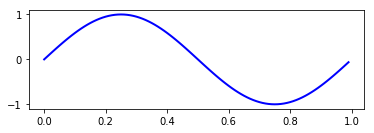

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(2,1,1) # two rows, one column, first plot
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

Axes可能是matplotlib的API中最重要的类，你接触最多的类。因为axes是大部分对象的画图的位置，并且axes有很多方法去创造常见的primitives。这些方法会接受参数，并按照需求创造artists实例，把他们放到相关的container中，在有需要的时候画出来。

Subplot实例也只是axes的一个特殊例子，如果你想创建一个任意位置的axes，只要用add_axes()就可以了，参数是0-1之间的相对坐标。

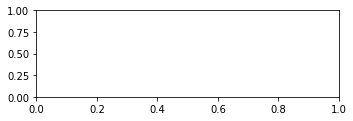

In [24]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

当你用ax.plot的时候，会在axes上添加一条线，也就是添加line2D对象到lines列表中，可以看到，lines\[0\]和返回的line是一样的

In [25]:
ax.lines[0]

In [26]:
line

如果你在ax.plot后又添加了线条，那么他也会被加入lines列表，可以用remove方法去删掉他

In [27]:
ax.lines.remove(line)

下面是一个完整的例子

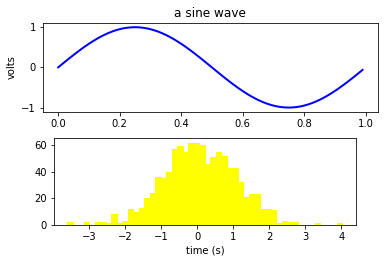

In [11]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('time (s)')

plt.show()

primitives和containers都有很多属性可以设置，更多的内容请看文档

# 2 Legend

先看几个例子

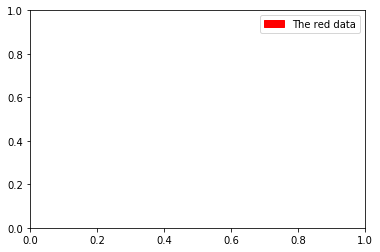

In [30]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])

plt.show()

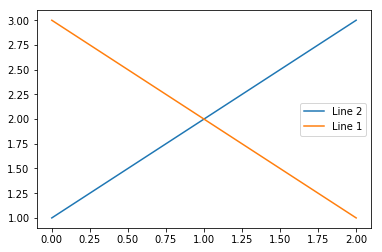

In [31]:
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend(handles=[line_up, line_down])

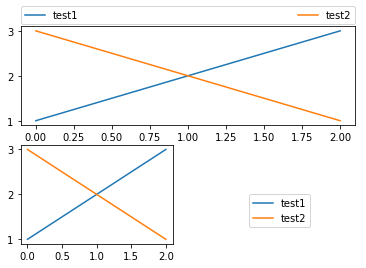

In [58]:
plt.subplot(211)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.5, 0.5), loc='upper left', borderaxespad=0.)

plt.show()

一般说明都是调用plt.legend()然后自动放置的，也可以定制他们的位置，用loc控制和bbox_to_anchor。更多的设置请看文档。

# 3 cycler

这主要是为了批量管理属性，看一下下面的例子

In [4]:
from cycler import cycler
x = np.linspace(0, 2 * np.pi, 50)
offsets = np.linspace(0, 2 * np.pi, 4, endpoint=False)
yy = np.transpose([np.sin(x + phi) for phi in offsets])

下面设置默认的风格color表示颜色，linestyle表示线条样式

In [5]:
default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)

下面设置我们的特殊风格，lw表示宽度

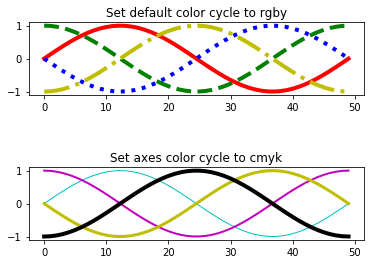

In [6]:
custom_cycler = (cycler(color=['c', 'm', 'y', 'k']) +
                 cycler(lw=[1, 2, 3, 4]))

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

ax1.set_prop_cycle(custom_cycler)
ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

# Add a bit more space between the two plots.
fig.subplots_adjust(hspace=1)
plt.show()

看一下内部的结构，我们就可以知道，在画图很多的时候，怎么样去将他们区分开

In [10]:
for d in custom_cycler:
    print(d)

{'color': 'c', 'linewidth': 1}
{'color': 'm', 'linewidth': 2}
{'color': 'y', 'linewidth': 3}
{'color': 'k', 'linewidth': 4}


甚至你可以用乘法来创建更多的样式

In [9]:
from cycler import cycler
cc = (cycler(color=list('rgb')) *
      cycler(linestyle=['-', '--', '-.']))
for d in cc:
    print(d)

{'color': 'r', 'linestyle': '-'}
{'color': 'r', 'linestyle': '--'}
{'color': 'r', 'linestyle': '-.'}
{'color': 'g', 'linestyle': '-'}
{'color': 'g', 'linestyle': '--'}
{'color': 'g', 'linestyle': '-.'}
{'color': 'b', 'linestyle': '-'}
{'color': 'b', 'linestyle': '--'}
{'color': 'b', 'linestyle': '-.'}


# 4 Path

使用Path()函数，加上提前预定的行动轨迹和行动方法，就可以在figure上画出想要的图像，下面是简单的矩形，还可以画圆形，更多的画法请看文档。

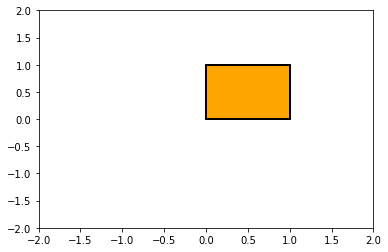

In [21]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
verts = [
   (0., 0.),  # left, bottom
   (0., 1.),  # left, top
   (1., 1.),  # right, top
   (1., 0.),  # right, bottom
   (0., 0.),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()